In [1]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc


In [48]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

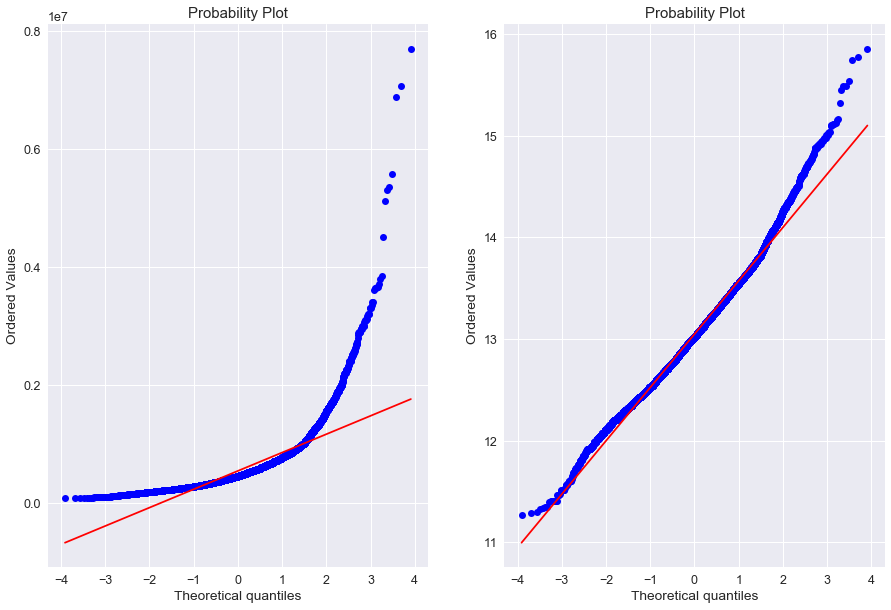

In [49]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['price'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['price']), plot=plt)


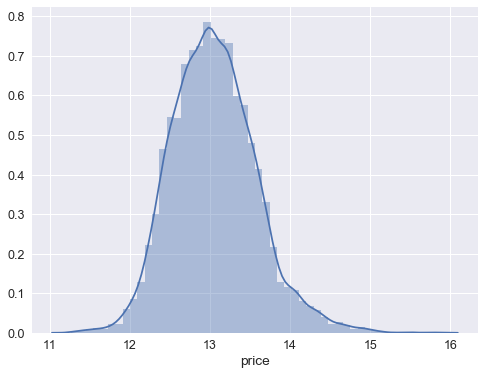

In [50]:
df_train['price'] = np.log1p(df_train['price'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])


['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


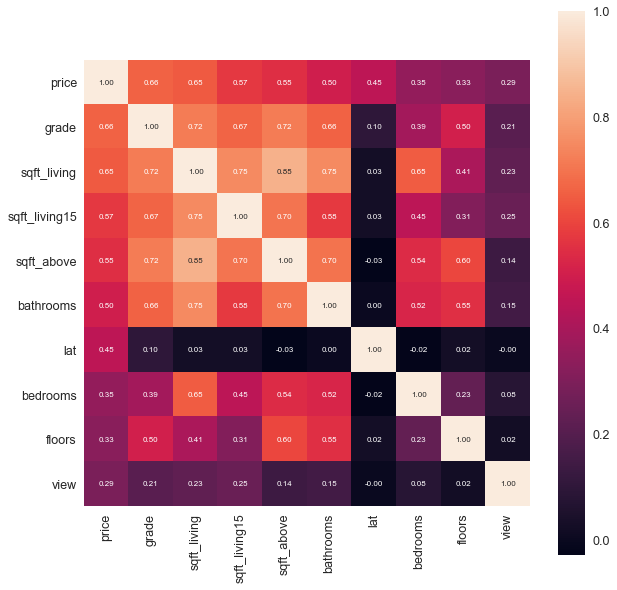

In [51]:
import scipy as sp

cor_abs = abs(df_train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='price').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)


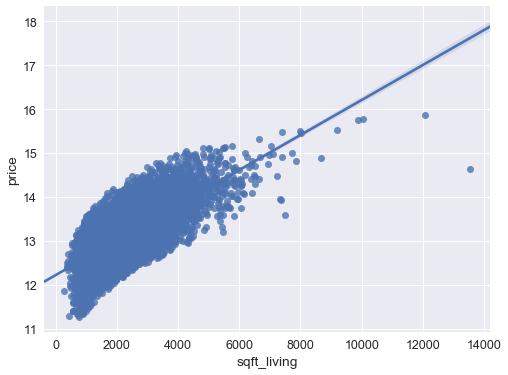

In [52]:
data = pd.concat([df_train['price'], df_train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y="price", data=data)


In [53]:
df_train.loc[df_train['sqft_living'] > 13000]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8912,8912,20140505T000000,14.639686,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [54]:
df_train = df_train.loc[df_train['id']!=8990]


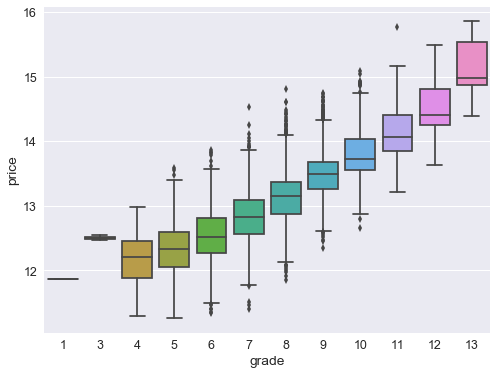

In [55]:
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)


In [56]:
df_train.loc[(df_train['price']>14.7) & (df_train['grade'] == 8)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7173,7173,20140813T000000,14.808763,5,4.0,4230,27295,2.0,1,4,...,8,3230,1000,1949,1985,98033,47.6803,-122.214,2660,27295


In [57]:
df_train.loc[(df_train['price']>15.5) & (df_train['grade'] == 11)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,15.77031,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.214,3930,25449


In [58]:
df_train = df_train.loc[df_train['id']!=456]
df_train = df_train.loc[df_train['id']!=7259]
df_train = df_train.loc[df_train['id']!=2777]


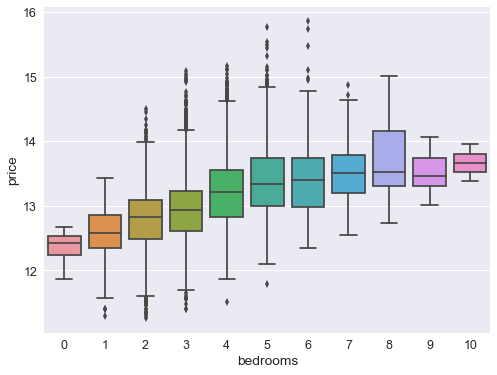

In [59]:
data = pd.concat([df_train['price'], df_train['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='bedrooms', y="price", data=data)


In [60]:
df_train.loc[df_train['bedrooms']>=10]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9280,9280,20140814T000000,13.953533,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
10575,10575,20141029T000000,13.384729,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


In [61]:
df_test.loc[df_test['bedrooms']>=10]


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2584,17619,20140821T000000,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
4710,19745,20140625T000000,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
5775,20810,20141229T000000,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [62]:
df_train = df_train.loc[df_train['bedrooms']<9]


In [63]:
skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    df_train[c] = np.log1p(df_train[c].values)
    df_test[c] = np.log1p(df_test[c].values)


In [64]:
for df in [df_train,df_test]:
    df['date'] = df['date'].apply(lambda x: x[0:8])
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])


In [65]:
df_train.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013,12.309987,3,1.00,7.074117,8.639588,1.0,0,0,...,7,7.074117,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,1,20150225,12.100718,2,1.00,6.647688,9.210440,1.0,0,0,...,6,6.647688,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
2,2,20150218,13.142168,3,2.00,7.427144,8.997271,1.0,0,0,...,8,7.427144,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503
3,3,20140627,12.458779,3,2.25,7.447751,8.827615,2.0,0,0,...,7,7.447751,0.0,1995,1995.0,98003,47.3097,-122.327,2238,6819
4,4,20150115,12.583999,3,1.50,6.966967,9.181118,1.0,0,0,...,7,6.966967,0.0,1963,1963.0,98198,47.4095,-122.315,1650,9711


In [66]:
for df in [df_train,df_test]:
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    #df['grade_condition'] = df['grade'] * df['condition']
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']
    df['sqft_total_size'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement']
    df['sqft_total15'] = df['sqft_living15'] + df['sqft_lot15'] 
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x == 0 else 1)
    df['date'] = df['date'].astype('int')


In [67]:
df_train['per_price'] = df_train['price']/df_train['sqft_total_size']
zipcode_price = df_train.groupby(['zipcode'])['per_price'].agg({'mean','var'}).reset_index()
df_train = pd.merge(df_train,zipcode_price,how='left',on='zipcode')
df_test = pd.merge(df_test,zipcode_price,how='left',on='zipcode')
del df_train['per_price']


Text(0,0.5,'score')

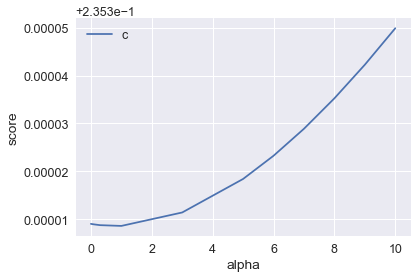

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import RidgeCV

y_reg = df_train['price']
del df_train['price']
del df_train['id']
test_id = df_test['id']
del df_test['id']

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, df_train, y_reg, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)

def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(),
                                RidgeCV(alphas = [k],
                                        cv=kfolds)).fit(df_train, y_reg)
    
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)

r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5,6,7,8,9,10]

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)
    
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')


In [69]:
alphas_alt = [5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7]

ridge_model2 = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=kfolds)).fit(df_train, y_reg)

print("Ridge rmse : ",cv_rmse(ridge_model2).mean())


Ridge rmse :  0.23532221843670195


In [70]:
print("Best of alpha in ridge model :" ,ridge_model2.steps[1][1].alpha_)


Best of alpha in ridge model : 5.8


[Text(0.5,0,'Penalized Regression Coefficients')]

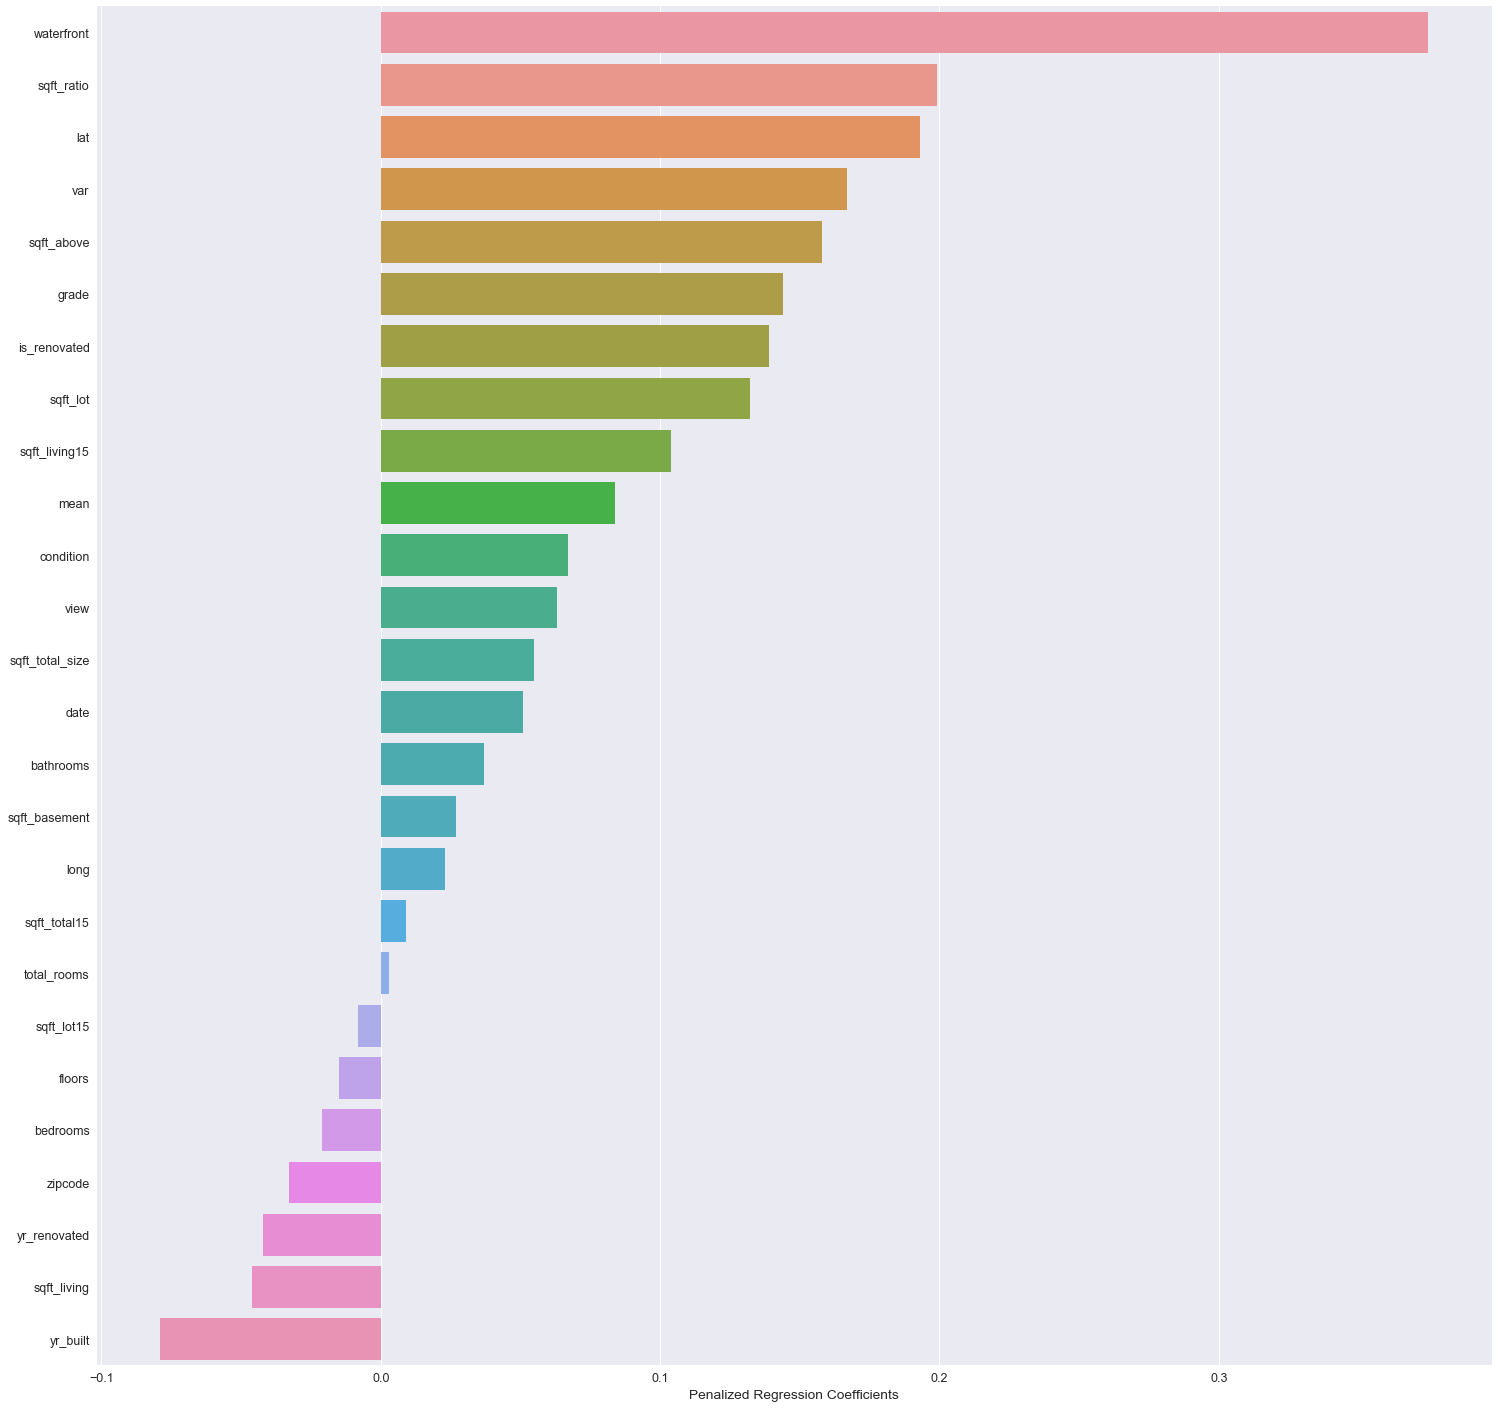

In [75]:
ridge_coef = pd.DataFrame(np.round_(ridge_model2.steps[1][1].coef_, decimals=3), 
df_test.columns, columns = ["penalized_regression_coefficients"])
# remove the non-zero coefficients
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
# sort the values from high to low
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', 
ascending = False)

# plot the sorted dataframe
fig = plt.figure(figsize = (25,25))
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , 
data=ridge_coef)
ax.set(xlabel='Penalized Regression Coefficients')


In [76]:
df_train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_rooms', 'sqft_ratio',
       'sqft_total_size', 'sqft_total15', 'is_renovated', 'mean', 'var'],
      dtype='object')

In [77]:
df_train['grade'] = df_train['grade'].apply(str)
df_test['grade'] = df_test['grade'].apply(str)

In [78]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [79]:
df_train.drop(columns=['grade_1'], inplace=True)
df_train.drop(columns=['grade_3'], inplace=True)
df_test.drop(columns=['grade_3'], inplace=True)


In [80]:
df_train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'total_rooms', 'sqft_ratio', 'sqft_total_size',
       'sqft_total15', 'is_renovated', 'mean', 'var', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9'],
      dtype='object')

In [82]:
train_columns = [c for c in df_train.columns if c not in ['id']]

In [83]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

param = {'num_leaves': 13,
         'min_data_in_leaf': 6, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.00385,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 5,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 9,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 923}
         
#prepare fit model with cross-validation
folds = KFold(n_splits=10, shuffle=True, random_state=37)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

#run model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train)):
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][train_columns], label=y_reg.iloc[trn_idx])#, categorical_feature=categorical_feats)
    val_data = lgb.Dataset(df_train.iloc[val_idx][train_columns], label=y_reg.iloc[val_idx])#, categorical_feature=categorical_feats)

    num_round = 3000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 500)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][train_columns], num_iteration=clf.best_iteration)
    #feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = train_columns
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    #predictions
    predictions += clf.predict(df_test[train_columns], num_iteration=clf.best_iteration) / folds.n_splits
    
cv = np.sqrt(mean_squared_error(oof, y_reg))
print(cv)


Training until validation scores don't improve for 500 rounds.
[5000]	training's rmse: 0.138741	valid_1's rmse: 0.164675
[10000]	training's rmse: 0.120513	valid_1's rmse: 0.161223
[15000]	training's rmse: 0.10783	valid_1's rmse: 0.160299
Early stopping, best iteration is:
[17435]	training's rmse: 0.102674	valid_1's rmse: 0.160061
Training until validation scores don't improve for 500 rounds.
[5000]	training's rmse: 0.139558	valid_1's rmse: 0.154903
[10000]	training's rmse: 0.121439	valid_1's rmse: 0.150702
[15000]	training's rmse: 0.10867	valid_1's rmse: 0.149467
[20000]	training's rmse: 0.09862	valid_1's rmse: 0.149011
Early stopping, best iteration is:
[21100]	training's rmse: 0.0965819	valid_1's rmse: 0.148841
Training until validation scores don't improve for 500 rounds.
[5000]	training's rmse: 0.138029	valid_1's rmse: 0.171185
[10000]	training's rmse: 0.120202	valid_1's rmse: 0.167585
[15000]	training's rmse: 0.107806	valid_1's rmse: 0.16643
Early stopping, best iteration is:
[180

In [30]:
#get_score_importances(score_func, X, y, n_iter=5, columns_to_shuffle=None, random_state=None)[source]

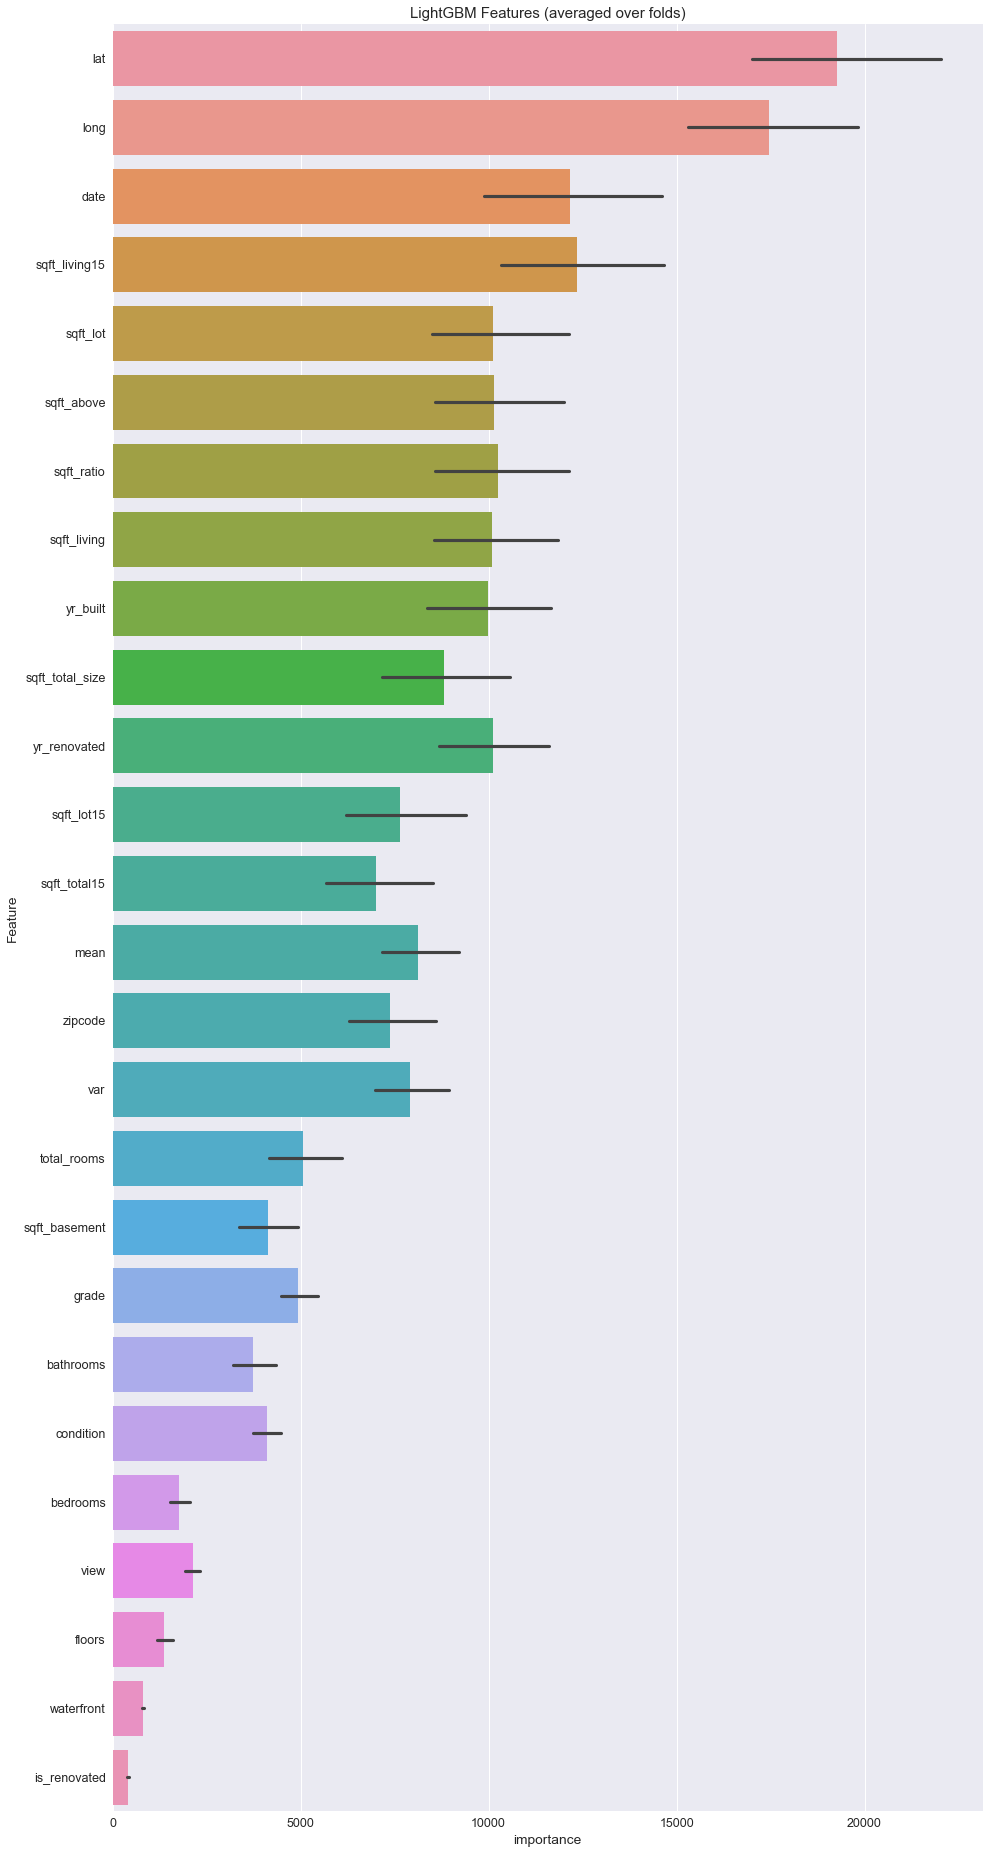

In [34]:
##plot the feature importance
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')


In [85]:
#test_ridge_preds = np.expm1(ridge_model2.predict(df_test))
test_lgb_preds = np.expm1(predictions)
test_ensemble_preds = test_lgb_preds


In [36]:
submission0 = pd.DataFrame({'id': test_id, 'price': test_ridge_preds})
submission0.to_csv('ridge.csv', index=False)


In [86]:
submission = pd.DataFrame({'id': test_id, 'price': test_lgb_preds})
submission.to_csv('lightgbm.csv', index=False)


In [ ]:
submission1 = pd.DataFrame({'id': test_id, 'price': test_ensemble_preds})
submission1.to_csv('WeightAvg1.csv', index=False)